                                     Credit Card Fraud Detection Predictive Models

Content

      i)Introduction
      ii)Load packages
      iii)Read the data
      iV)Check the data
             >>Glimpse the data
             >>Check missing data
             >>Check data unbalance
      v)EDA
      Vi)Data exploration 
             >>Transaction in time 
             >>Transactions amount
             >>Features correlation
             >>Feature density plot
       
                            
      vii)Predictive models 
      Viii)Model Training and Evaluation
            CLASSIFICATION ALGORITHMS 
                                       >>Random Forrest Classifier
                                       >>AdaBoostClassifier
                                       >>CatBoostClassifier
                                       >>XGBoost
                                       >>LightGBM
            
    iX)Model Comparing                                  
    X)Streamlit Deployment
    Xi)Conclusions
    Xii)References

i) INTRODUCTION :- 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.


ii) Load Packages :- 

In [452]:

# LOAD REQUIRED LIBRARIES & CONFIGURE SETTINGS


# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Plotly
init_notebook_mode(connected=True)

# System, date, and garbage collection
import os
import gc
from datetime import datetime

# Machine Learning Models
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Advanced ML Libraries
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Set display options
pd.set_option('display.max_columns', 100)
%matplotlib inline


# CONFIGURATION SETTINGS
# General Model Settings
RANDOM_STATE = 42
RFC_METRIC = 'gini'
NUM_ESTIMATORS = 100
NO_JOBS = -1  # Use all processors

# Train/Test Split Parameters
VALID_SIZE = 0.20
TEST_SIZE = 0.20
NUMBER_KFOLDS = 5

# LightGBM Parameters
MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50






iii) Read The Dataset

In [102]:

# READ THE DATASET
import pandas as pd

# Define the relative path to your uploaded Excel csv 
dataset_path = r"C:\Users\POOJA\Desktop\FinalCredit\creditcard.csv"
df = pd.read_csv(dataset_path)
print("[✅] Dataset loaded successfully!")



[✅] Dataset loaded successfully!


iv) Check The Data

In [103]:
print("Credit Card Fraud Detection data - rows:", df.shape[0], "columns:", df.shape[1])


Credit Card Fraud Detection data - rows: 284807 columns: 31


    >> Glimpse the data- We start by looking to the data features (first 10 rows)

In [104]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's look into more details to the data 

In [106]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [108]:
df.Class.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


Looking to the Time Feature,we can confirm that the data contains 284,807 transactions,during 2 consecutive days (or 172792)


   
 >> Check Missing Data : - Let's check if there is any missing data 

In [114]:
# Check for missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Combine into one DataFrame for easy viewing
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# Display as a nice table (just remove print)
missing_data


,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset 


   
   >>Data unbalance :- Let's Check data unbalance with respect with target value,i.e Class

In [118]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

V)EDA :- 

Exploratory Data Analysis (EDA) is a crucial step in the data science process that helps you understand the structure, patterns, and quality of the data before applying any machine learning models. It involves visualizing distributions, identifying outliers, checking for missing or imbalanced data, and exploring feature relationships. EDA ensures data is clean, meaningful, and ready for modeling.

Skipping EDA can lead to serious issues such as using incorrect or irrelevant features, ignoring missing values or outliers, and failing to detect data imbalance—especially in classification problems like fraud detection. As a result, model evaluation metrics may appear misleadingly high, masking poor performance on critical cases. Without EDA, your model is more likely to overfit or underperform in real-world scenarios, making it unreliable. Therefore, EDA is essential for building accurate, interpretable, and robust machine learning models.

Class Distribution

C:\Users\POOJA\AppData\Local\Temp\ipykernel_8492\912397822.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




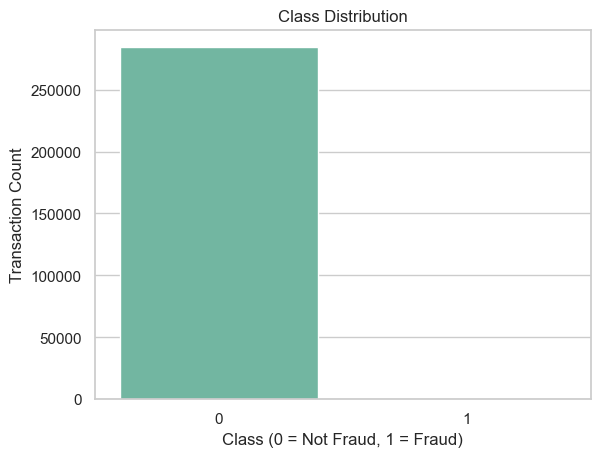

In [474]:
# Count of fraudulent vs non-fraudulent transactions
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Transaction Count")
plt.show()


KDE plot for V14

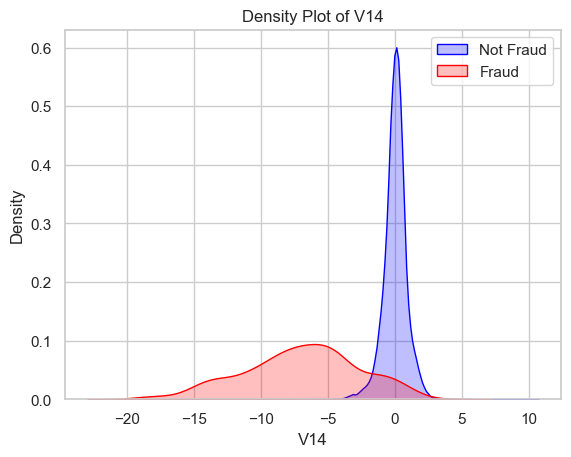

In [479]:
# KDE plot for V14 feature
sns.kdeplot(df['V14'][df['Class'] == 0], label='Not Fraud', fill=True, color='blue')
sns.kdeplot(df['V14'][df['Class'] == 1], label='Fraud', fill=True, color='red')
plt.title("Density Plot of V14")
plt.legend()
plt.show()


KDE Plot for Amount

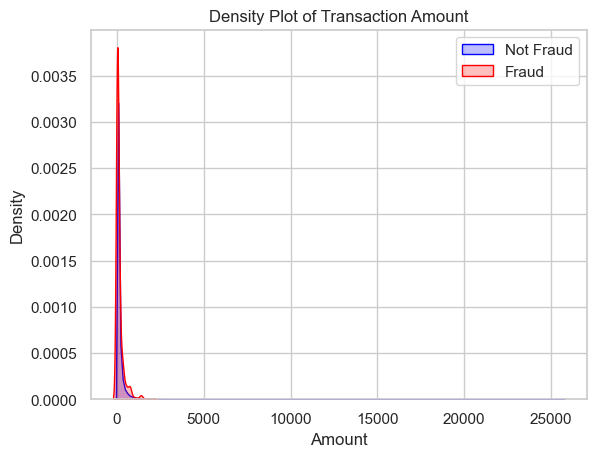

In [481]:
# KDE plot for transaction Amount
sns.kdeplot(df['Amount'][df['Class'] == 0], label='Not Fraud', fill=True, color='blue')
sns.kdeplot(df['Amount'][df['Class'] == 1], label='Fraud', fill=True, color='red')
plt.title("Density Plot of Transaction Amount")
plt.legend()
plt.show()


Feature Distribution by Class (V10 Example)

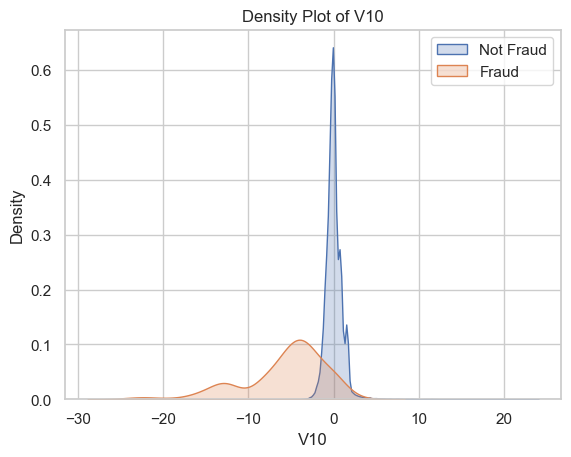

In [485]:
# KDE for feature V10
sns.kdeplot(df['V10'][df['Class'] == 0], label='Not Fraud', fill=True)
sns.kdeplot(df['V10'][df['Class'] == 1], label='Fraud', fill=True)
plt.title("Density Plot of V10")
plt.legend()
plt.show()


Boxplot for Transaction Amount

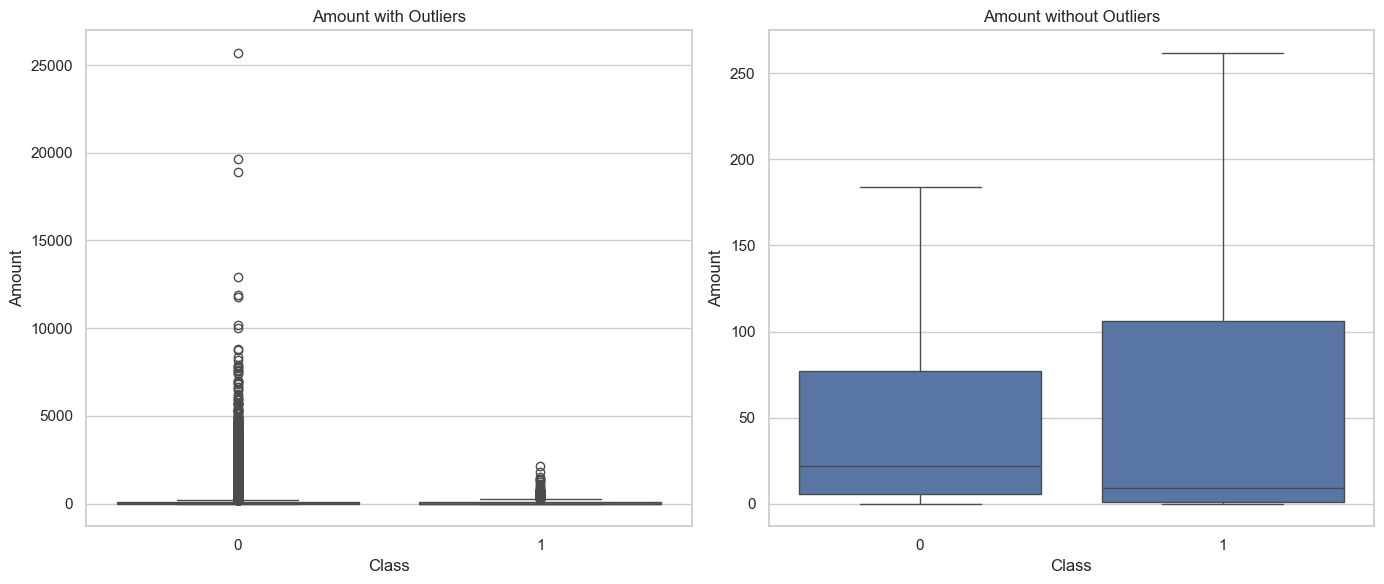

In [487]:
# Boxplot for transaction amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Class', y='Amount', data=df, ax=ax1, showfliers=True)
ax1.set_title('Amount with Outliers')

sns.boxplot(x='Class', y='Amount', data=df, ax=ax2, showfliers=False)
ax2.set_title('Amount without Outliers')

plt.tight_layout()
plt.show()


Create'Hour' Column from Time

In [489]:
# Add a new column 'Hour' derived from 'Time'
df['Hour'] = (df['Time'] // 3600).astype(int)
df['Hour'].head()


0    0
1    0
2    0
3    0
4    0
Name: Hour, dtype: int32

KDE for Top Features(V17,V12)

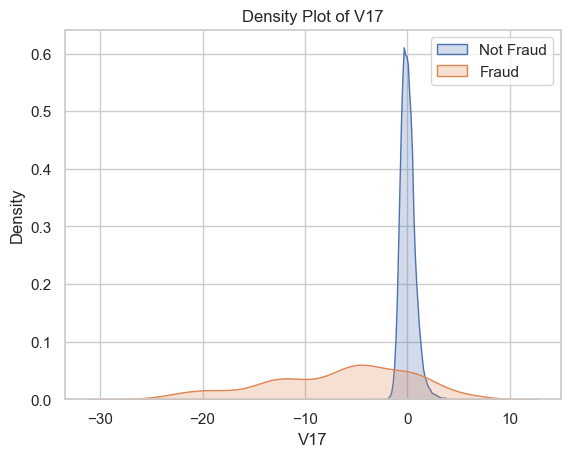

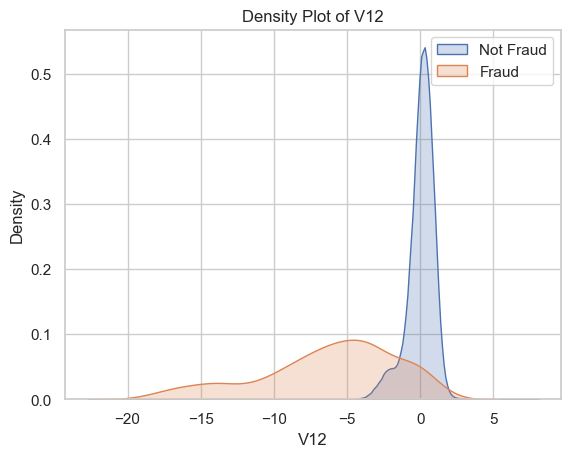

In [468]:
top_features = ['V17', 'V12']
for feature in top_features:
    sns.kdeplot(df[feature][df['Class'] == 0], label='Not Fraud', fill=True)
    sns.kdeplot(df[feature][df['Class'] == 1], label='Fraud', fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.legend()
    plt.show()


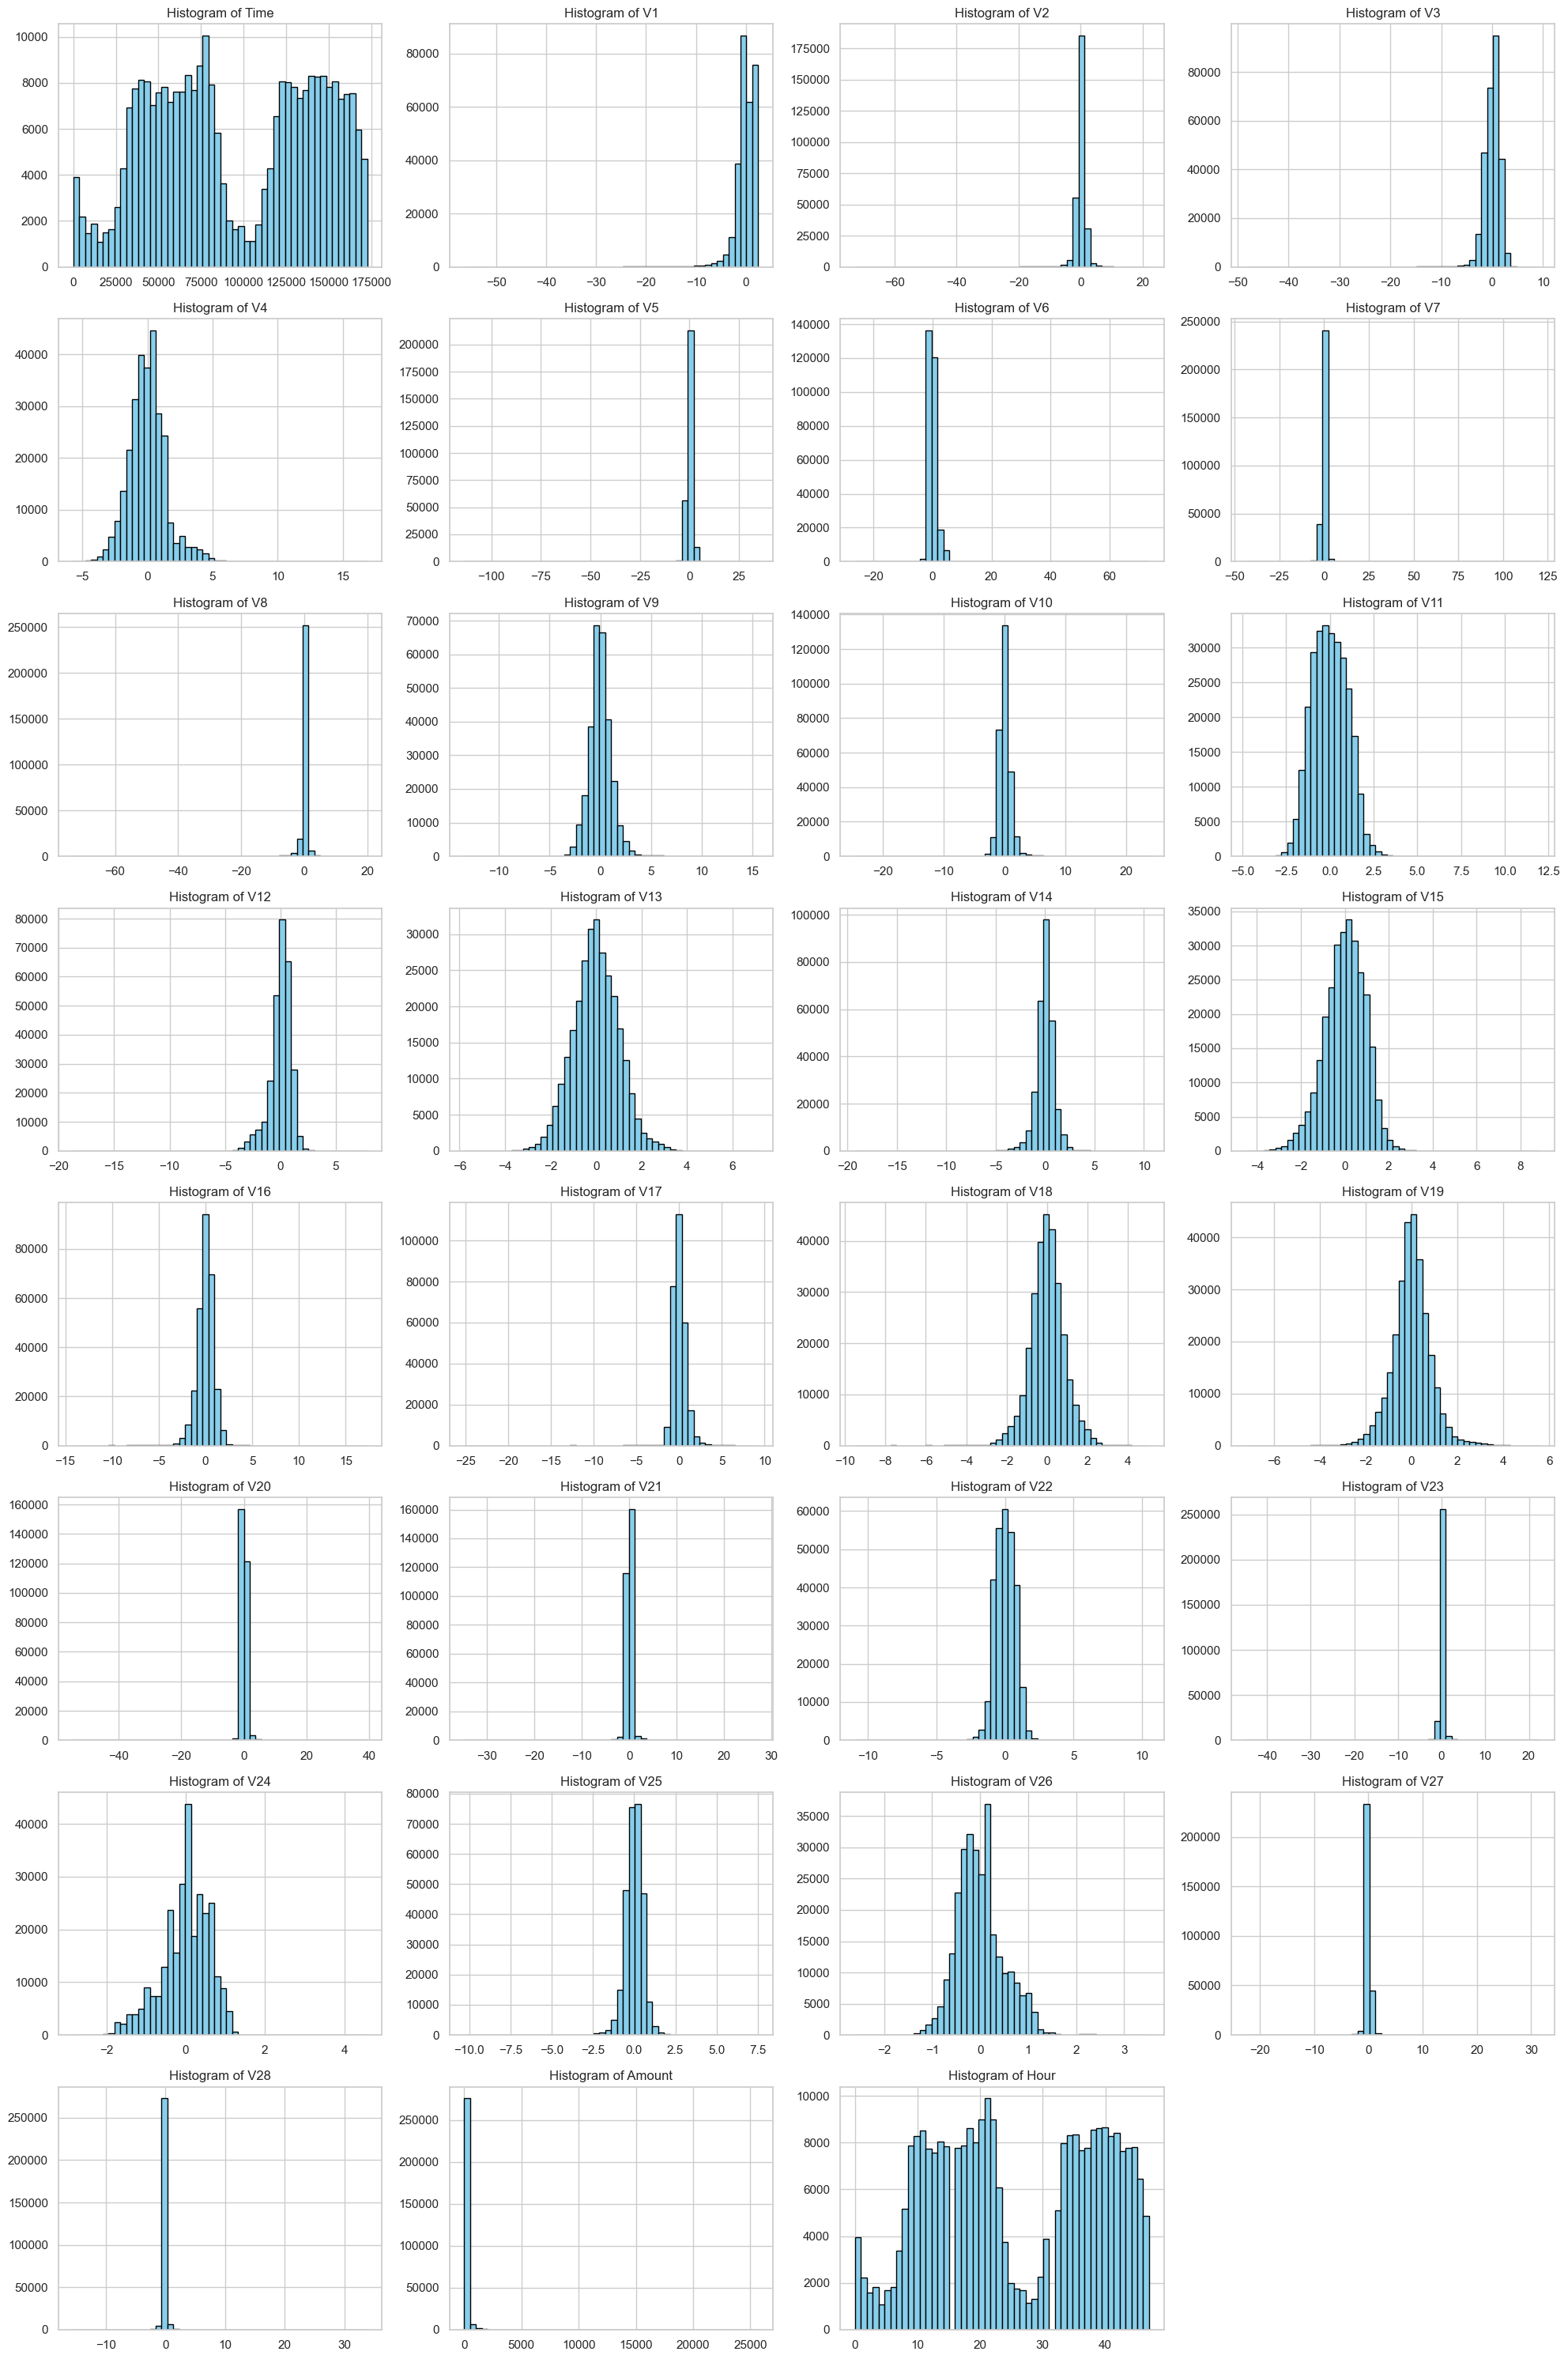

In [473]:
import matplotlib.pyplot as plt

# Get numeric columns except target
num_cols = df.select_dtypes(include='number').columns.drop('Class')

# Create histograms
plt.figure(figsize=(20, 30))  # big size for many subplots
for i, col in enumerate(num_cols):
    plt.subplot(8, 4, i + 1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()


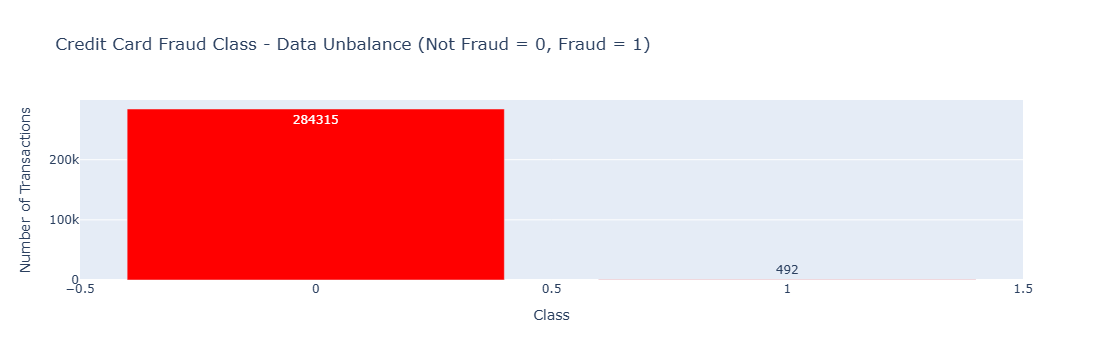

In [120]:

temp = df["Class"].value_counts()
class_df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

# Create the bar plot
trace = go.Bar(
    x=class_df['Class'],
    y=class_df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="red"),
    text=class_df['values']
)
data = [trace]
layout = dict(
    title='Credit Card Fraud Class - Data Unbalance (Not Fraud = 0, Fraud = 1)',
    xaxis=dict(title='Class', showticklabels=True),
    yaxis=dict(title='Number of Transactions'),
    hovermode='closest',
    width=600
)

fig = dict(data=data, layout=layout)
iplot(fig)

Only 492(or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with respect with target variable Class.



Vi) Data Exploration & Data Preprocessing  :- Transaction in time 

Data Exploration is the initial step in the data analysis process, where data is thoroughly examined to understand its structure, patterns, and relationships. This stage involves statistical summaries, visualizations, and identifying key characteristics such as distributions, outliers, and correlations between features. The goal is to uncover insights, detect anomalies, and formulate hypotheses for further analysis or model development.

Data Preprocessing follows data exploration and prepares the data for machine learning models. It includes cleaning the data by handling missing values, removing duplicates, and addressing outliers. Additionally, it involves feature scaling, encoding categorical variables, and normalizing or transforming features to ensure consistency and improve model performance. Effective data preprocessing helps in improving the accuracy, efficiency, and interpretability of machine learning algorithms, making it a crucial step for building successful models.



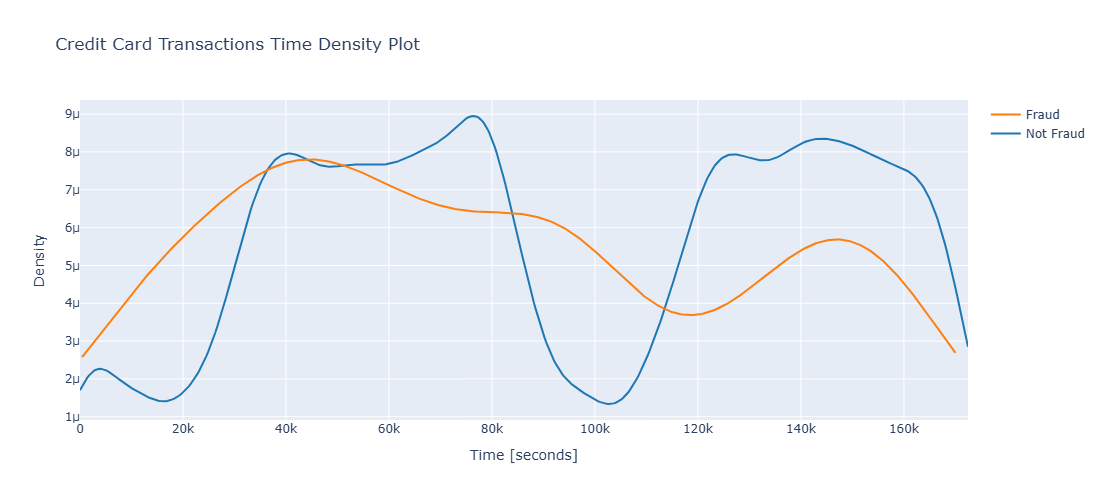

In [124]:
#filter 'Time' column for both classes: 0 (Not Fraud), 1 (Fraud)
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']
#Create a histogram distribution plot 
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.update_layout(
    title='Credit Card Transactions Time Density Plot',
    xaxis_title='Time [seconds]',
    yaxis_title='Density',
    width=800,
    height=500
)
iplot(fig)
plt.show()


Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [127]:

# Creating 'Hour' from 'Time' column (assuming Time is in seconds)
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Group by 'Hour' and 'Class' and perform the aggregation
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()

# Creating a new dataframe with renamed columns
df_aggregated = pd.DataFrame(tmp)
df_aggregated.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']

# Display the first few rows
df_aggregated.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


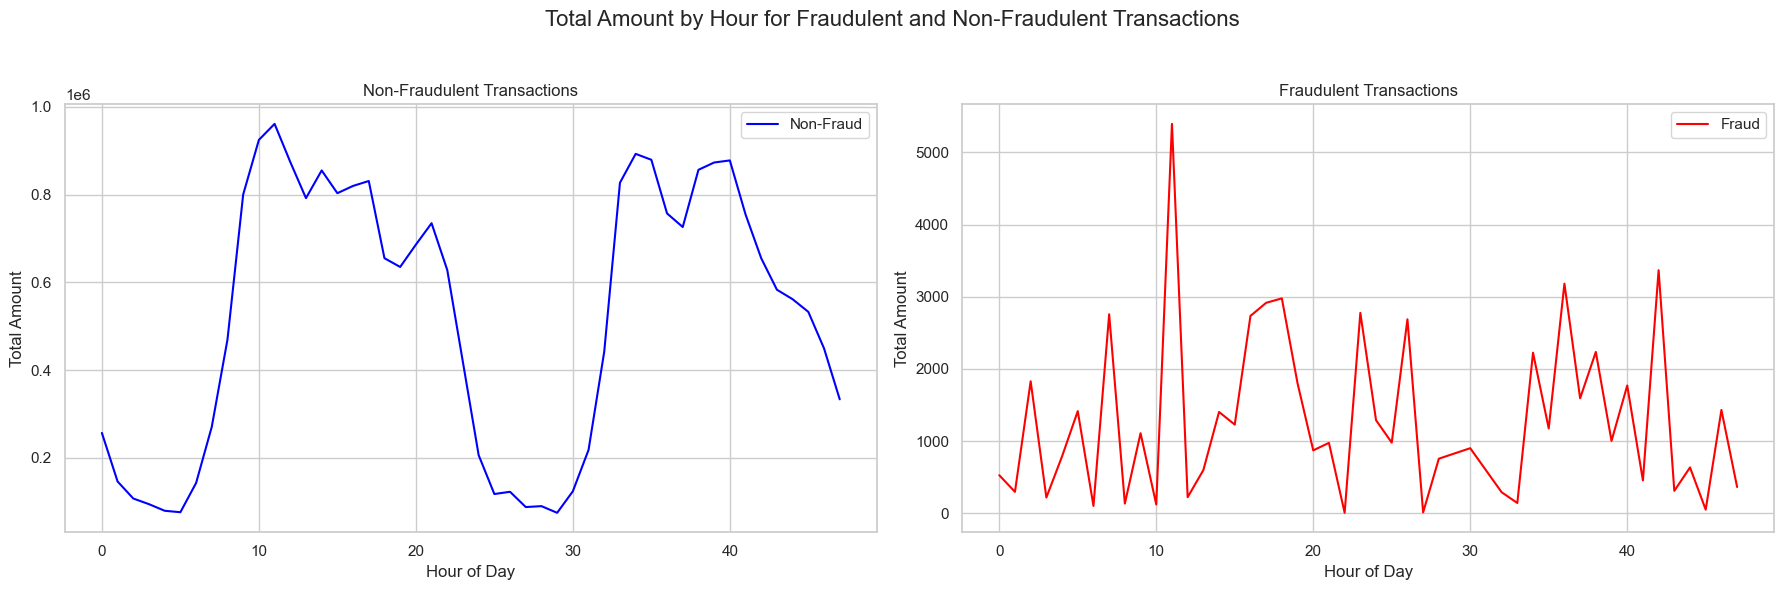

In [129]:
# Create 'Hour' column if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Group data to compute total transaction amount per hour for each class
grouped = df.groupby(['Hour', 'Class'])['Amount'].sum().reset_index(name='TotalAmount')

# Split grouped data
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear any previous plots
plt.clf()
plt.close('all')

# Create subplots
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Non-Fraud plot
sns.lineplot(ax=ax1, x='Hour', y='TotalAmount', data=df_non_fraud, color='blue', label='Non-Fraud')
ax1.set_title('Non-Fraudulent Transactions')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Total Amount')
ax1.legend()

# Fraud plot
sns.lineplot(ax=ax2, x='Hour', y='TotalAmount', data=df_fraud, color='red', label='Fraud')
ax2.set_title('Fraudulent Transactions')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Total Amount')
ax2.legend()

# Main title
plt.suptitle("Total Amount by Hour for Fraudulent and Non-Fraudulent Transactions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


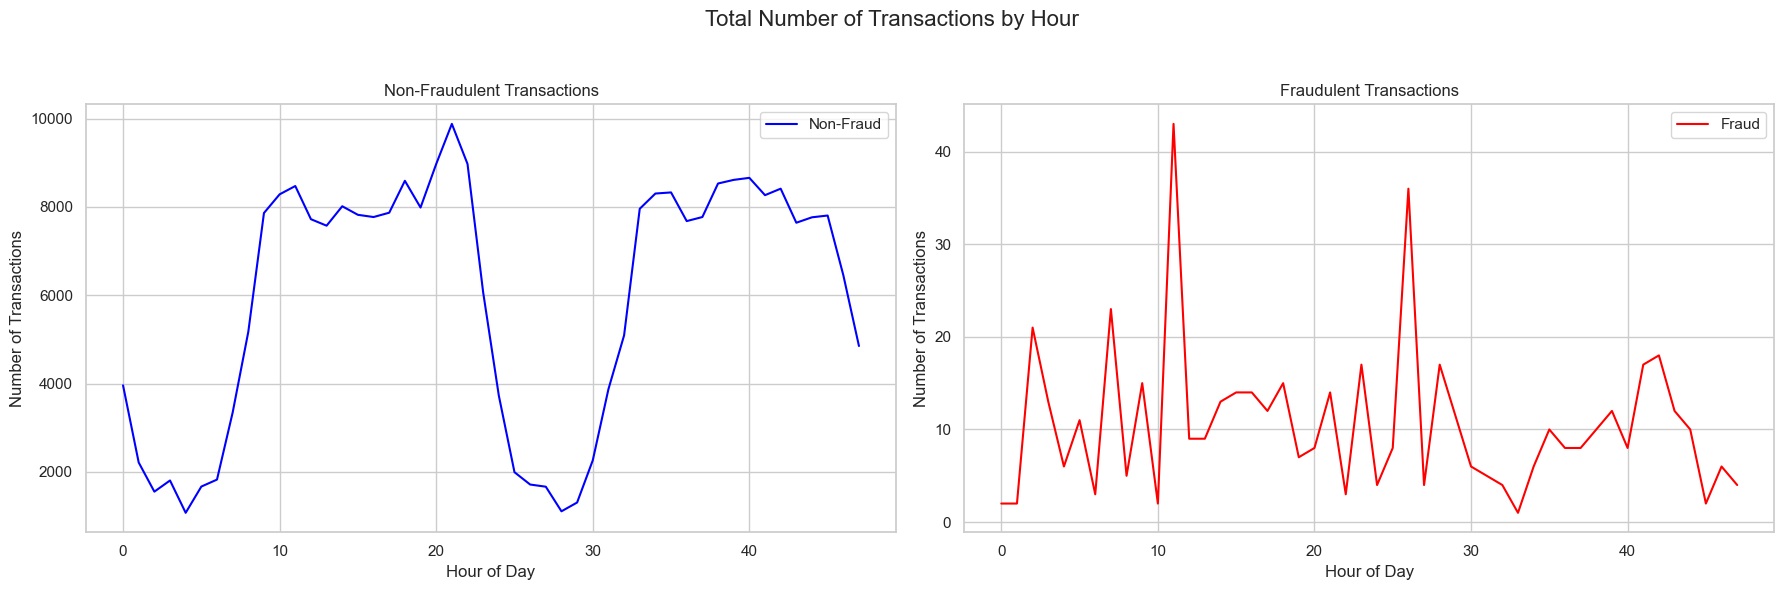

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Hour' column from 'Time' if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Calculate the number of transactions (count) per hour for each class
grouped = df.groupby(['Hour', 'Class']).size().reset_index(name='Transactions')

# Separate data for plotting
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear any previous plots
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot for Non-Fraudulent Transactions (Class 0)
sns.lineplot(ax=ax1, x="Hour", y="Transactions", data=df_non_fraud, color="blue", label="Non-Fraud")
ax1.set_title("Non-Fraudulent Transactions")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Number of Transactions")
ax1.legend()

# Plot for Fraudulent Transactions (Class 1)
sns.lineplot(ax=ax2, x="Hour", y="Transactions", data=df_fraud, color="red", label="Fraud")
ax2.set_title("Fraudulent Transactions")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Number of Transactions")
ax2.legend()

# Overall title
plt.suptitle("Total Number of Transactions by Hour", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


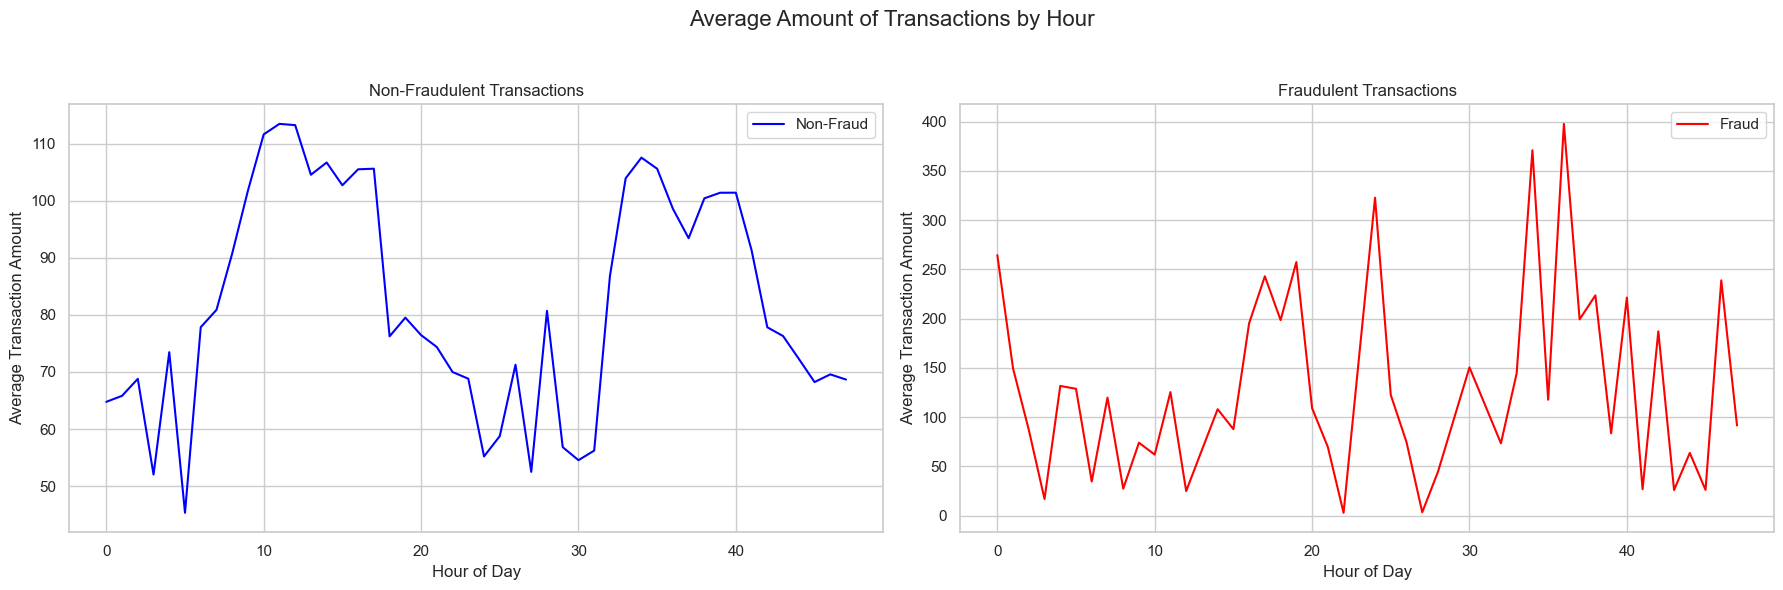

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Hour' column from 'Time' if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Calculate mean amount per hour for each class
grouped = df.groupby(['Hour', 'Class'])['Amount'].mean().reset_index(name='Mean')

# Separate grouped data
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear previous plots
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot Non-Fraudulent average amounts
sns.lineplot(ax=ax1, x="Hour", y="Mean", data=df_non_fraud, color="blue", label="Non-Fraud")
ax1.set_title("Non-Fraudulent Transactions")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Average Transaction Amount")
ax1.legend()

# Plot Fraudulent average amounts
sns.lineplot(ax=ax2, x="Hour", y="Mean", data=df_fraud, color="red", label="Fraud")
ax2.set_title("Fraudulent Transactions")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Average Transaction Amount")
ax2.legend()

# Overall title
plt.suptitle("Average Amount of Transactions by Hour", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


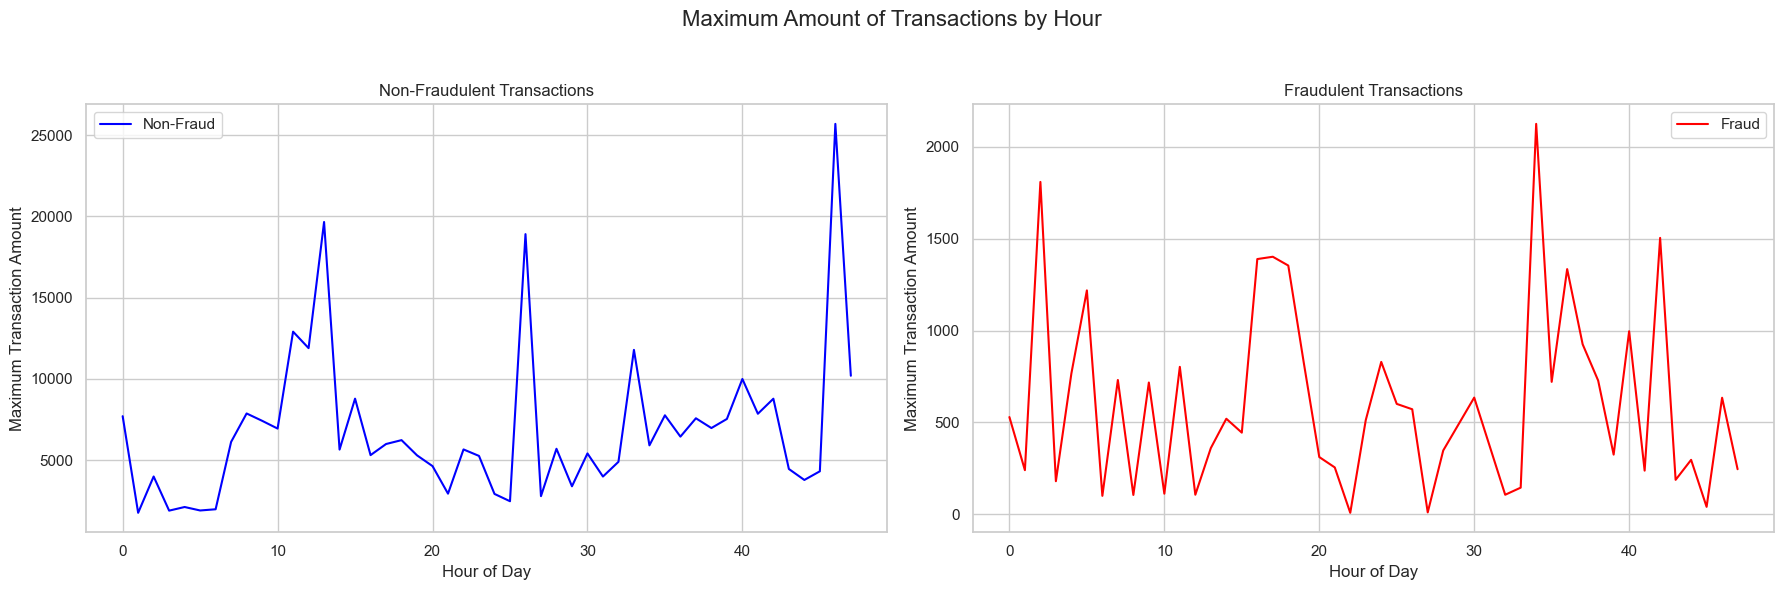

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Hour' column from 'Time' if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Calculate maximum transaction amount per hour for each class
grouped = df.groupby(['Hour', 'Class'])['Amount'].max().reset_index(name='Max')

# Separate grouped data
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear previous plots
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot Non-Fraudulent max amounts
sns.lineplot(ax=ax1, x="Hour", y="Max", data=df_non_fraud, color="blue", label="Non-Fraud")
ax1.set_title("Non-Fraudulent Transactions")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Maximum Transaction Amount")
ax1.legend()

# Plot Fraudulent max amounts
sns.lineplot(ax=ax2, x="Hour", y="Max", data=df_fraud, color="red", label="Fraud")
ax2.set_title("Fraudulent Transactions")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Maximum Transaction Amount")
ax2.legend()

# Overall title
plt.suptitle("Maximum Amount of Transactions by Hour", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


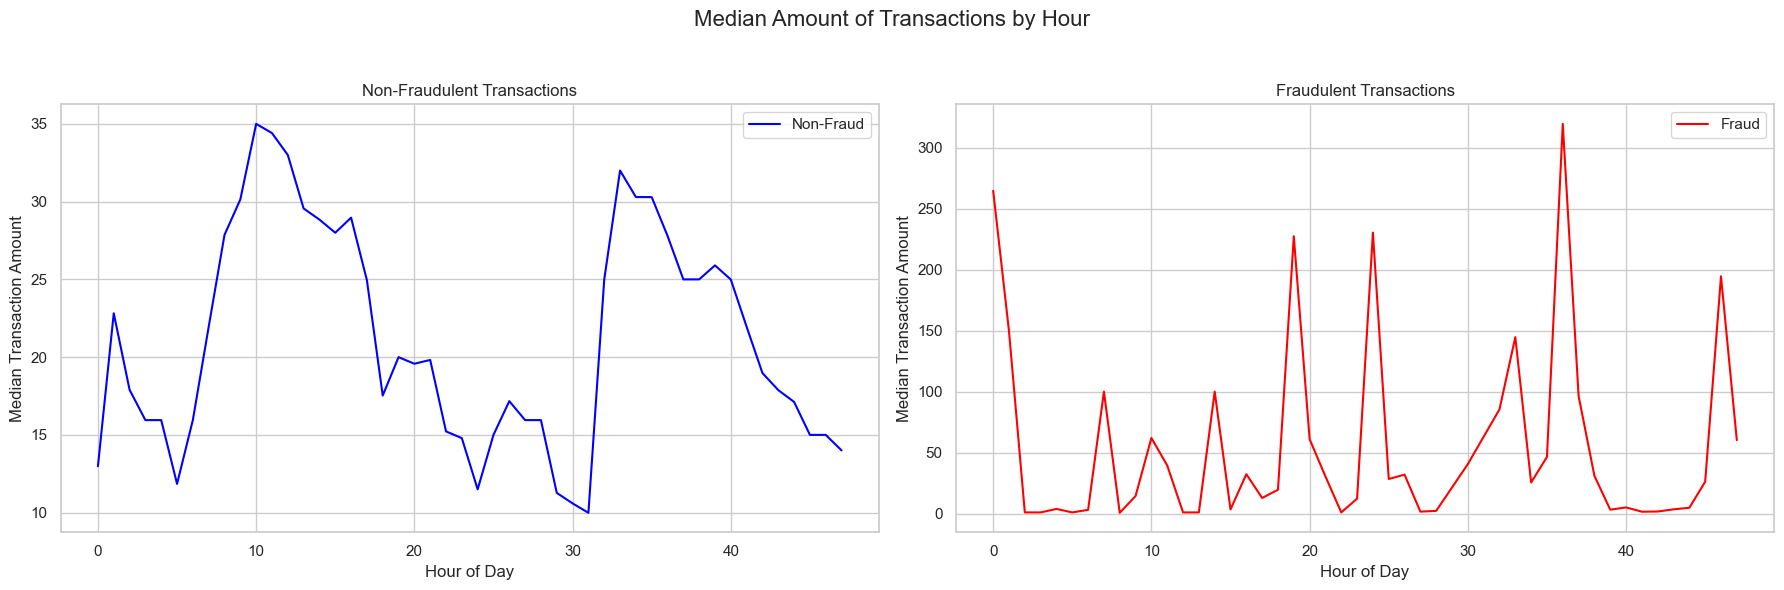

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Hour' column from 'Time' if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Calculate median transaction amount per hour for each class
grouped = df.groupby(['Hour', 'Class'])['Amount'].median().reset_index(name='Median')

# Separate grouped data
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear previous plots
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot Non-Fraudulent median amounts
sns.lineplot(ax=ax1, x="Hour", y="Median", data=df_non_fraud, color="blue", label="Non-Fraud")
ax1.set_title("Non-Fraudulent Transactions")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Median Transaction Amount")
ax1.legend()

# Plot Fraudulent median amounts
sns.lineplot(ax=ax2, x="Hour", y="Median", data=df_fraud, color="red", label="Fraud")
ax2.set_title("Fraudulent Transactions")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Median Transaction Amount")
ax2.legend()

# Overall title
plt.suptitle("Median Amount of Transactions by Hour", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


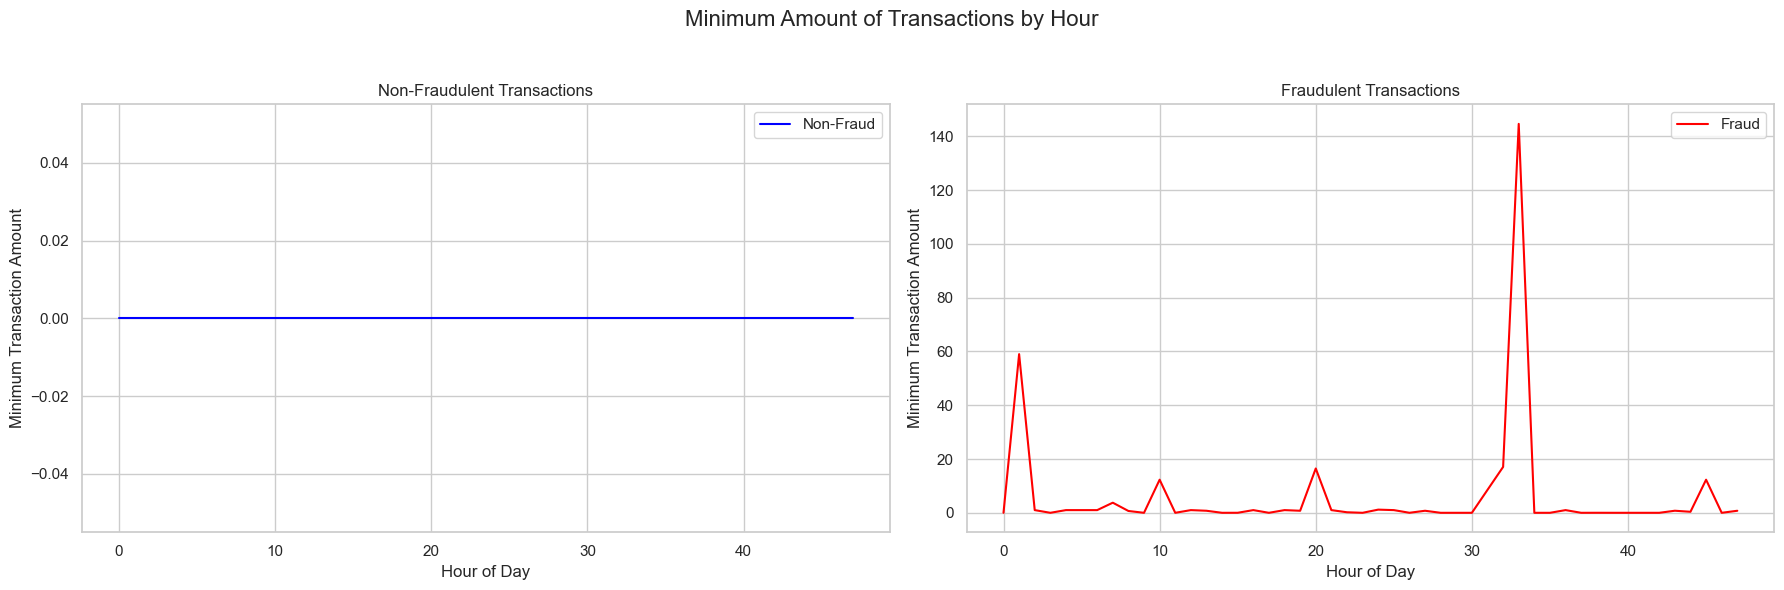

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Hour' column from 'Time' if not already present
df['Hour'] = (df['Time'] // 3600).astype(int)

# Calculate minimum transaction amount per hour for each class
grouped = df.groupby(['Hour', 'Class'])['Amount'].min().reset_index(name='Min')

# Separate grouped data
df_non_fraud = grouped[grouped['Class'] == 0]
df_fraud = grouped[grouped['Class'] == 1]

# Clear previous plots
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot Non-Fraudulent min amounts
sns.lineplot(ax=ax1, x="Hour", y="Min", data=df_non_fraud, color="blue", label="Non-Fraud")
ax1.set_title("Non-Fraudulent Transactions")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Minimum Transaction Amount")
ax1.legend()

# Plot Fraudulent min amounts
sns.lineplot(ax=ax2, x="Hour", y="Min", data=df_fraud, color="red", label="Fraud")
ax2.set_title("Fraudulent Transactions")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Minimum Transaction Amount")
ax2.legend()

# Overall title
plt.suptitle("Minimum Amount of Transactions by Hour", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Transactions amount 

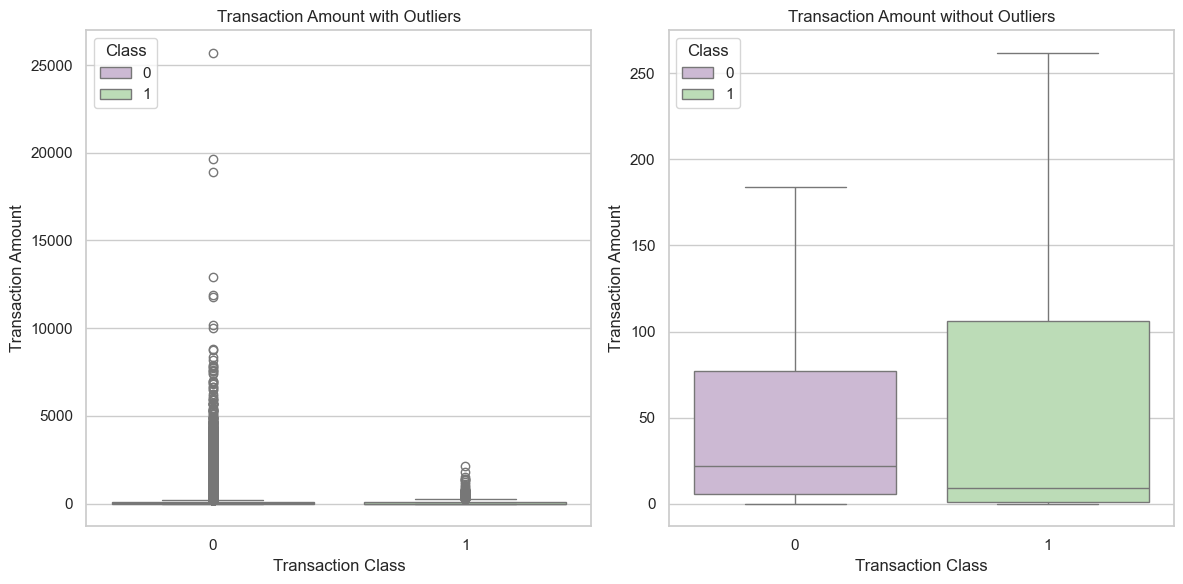

In [142]:

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots: two box plots side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Boxplot with outliers
sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df, 
            palette="PRGn", showfliers=True)
ax1.set_title("Transaction Amount with Outliers")
ax1.set_xlabel("Transaction Class")
ax1.set_ylabel("Transaction Amount")
ax1.legend(title="Class", loc='upper left')

# Boxplot without outliers
sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df, 
            palette="PRGn", showfliers=False)
ax2.set_title("Transaction Amount without Outliers")
ax2.set_xlabel("Transaction Class")
ax2.set_ylabel("Transaction Amount")
ax2.legend(title="Class", loc='upper left')

# Adjust layout to prevent overlap and show plots
plt.tight_layout()
plt.show()


In [144]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [146]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

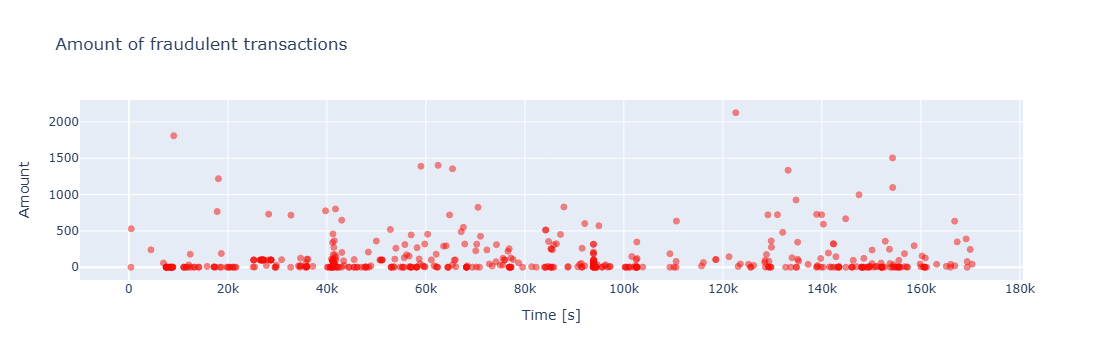

In [149]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')


Feature Correlation :- 

Feature correlation in machine learning refers to the relationship between two or more features in a dataset, indicating how changes in one feature may relate to changes in another. It is crucial for understanding data relationships, detecting multicollinearity, and improving model performance. Highly correlated features can lead to multicollinearity, which destabilizes model parameters and may cause overfitting. Addressing this by removing redundant features, using dimensionality reduction techniques like PCA, or applying regularization helps reduce model complexity, improving interpretability and generalization. By identifying and handling correlated features, you can build more efficient and accurate models that train faster and perform better on unseen data. Properly managing correlations simplifies the model, reduces overfitting, and enhances the predictive power, ultimately leading to more reliable machine learning solutions.


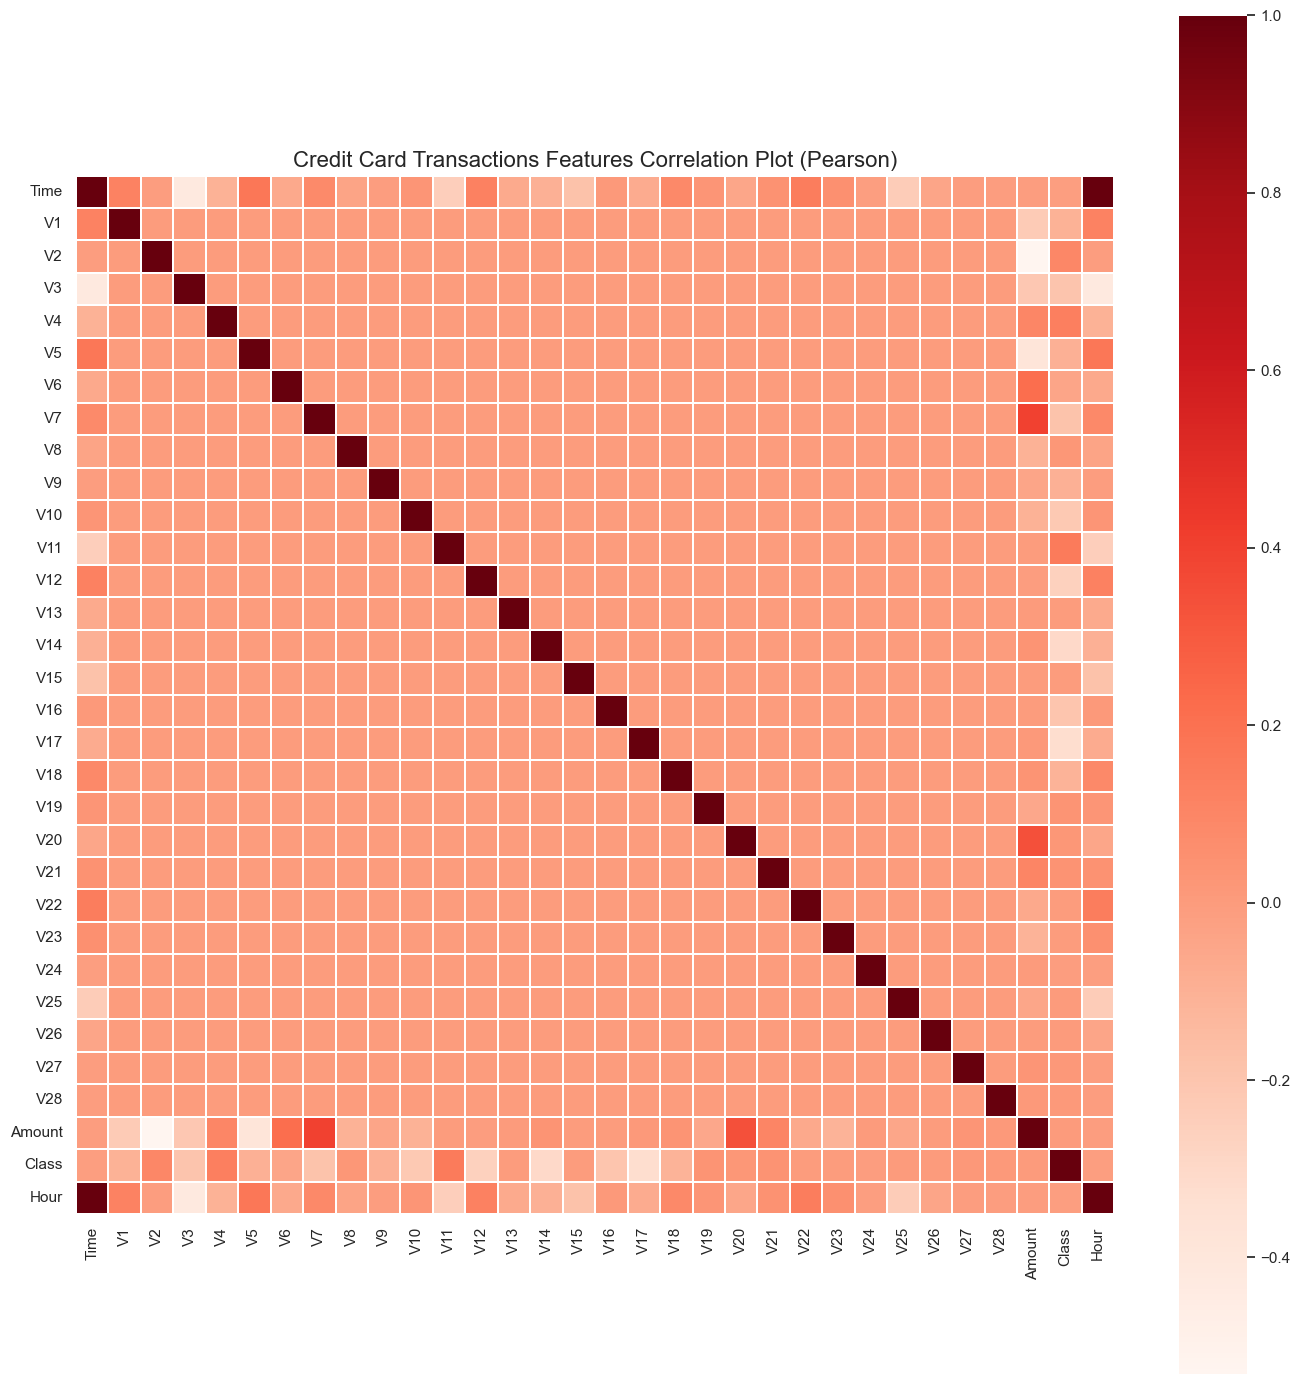

In [152]:

# Create the correlation matrix
corr = df.corr(numeric_only=True)  # Ensures only numeric columns are used

# Plot the heatmap cleanly
plt.figure(figsize=(14, 14))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            linewidths=0.1, 
            cmap="Reds", 
            fmt=".2f", 
            square=True)

# Set title
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

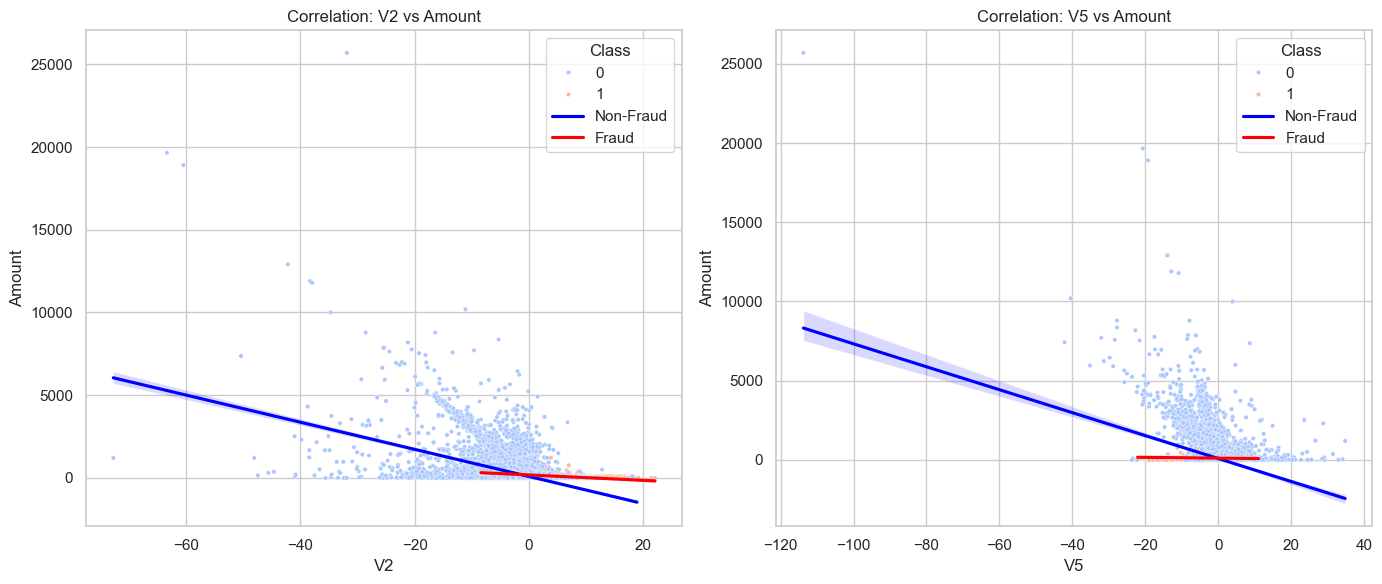

In [158]:

# Set style
sns.set(style="whitegrid")
# Sample only 10% of the data to make plotting faster
sample_df = df.sample(frac=0.1, random_state=42)

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Plot: V2 vs Amount
sns.scatterplot(ax=ax1, x='V2', y='Amount', data=df, hue='Class', palette='coolwarm', s=10)
sns.regplot(ax=ax1, x='V2', y='Amount', data=df[df['Class'] == 0], scatter=False, color='blue', label='Non-Fraud')
sns.regplot(ax=ax1, x='V2', y='Amount', data=df[df['Class'] == 1], scatter=False, color='red', label='Fraud')
ax1.set_title('Correlation: V2 vs Amount')
ax1.legend(title='Class')

# Plot: V5 vs Amount
sns.scatterplot(ax=ax2, x='V5', y='Amount', data=df, hue='Class', palette='coolwarm', s=10)
sns.regplot(ax=ax2, x='V5', y='Amount', data=df[df['Class'] == 0], scatter=False, color='blue', label='Non-Fraud')
sns.regplot(ax=ax2, x='V5', y='Amount', data=df[df['Class'] == 1], scatter=False, color='red', label='Fraud')
ax2.set_title('Correlation: V5 vs Amount')
ax2.legend(title='Class')

# Layout fix
plt.tight_layout()
plt.show()



Features Density Plot :-

A Feature Density Plot (often visualized using a Kernel Density Estimate (KDE) plot) is a graphical representation of the distribution of a single feature (variable) in a dataset. It is commonly used in Machine Learning (ML) and data analysis to understand the spread and the underlying distribution of the data for a given feature.

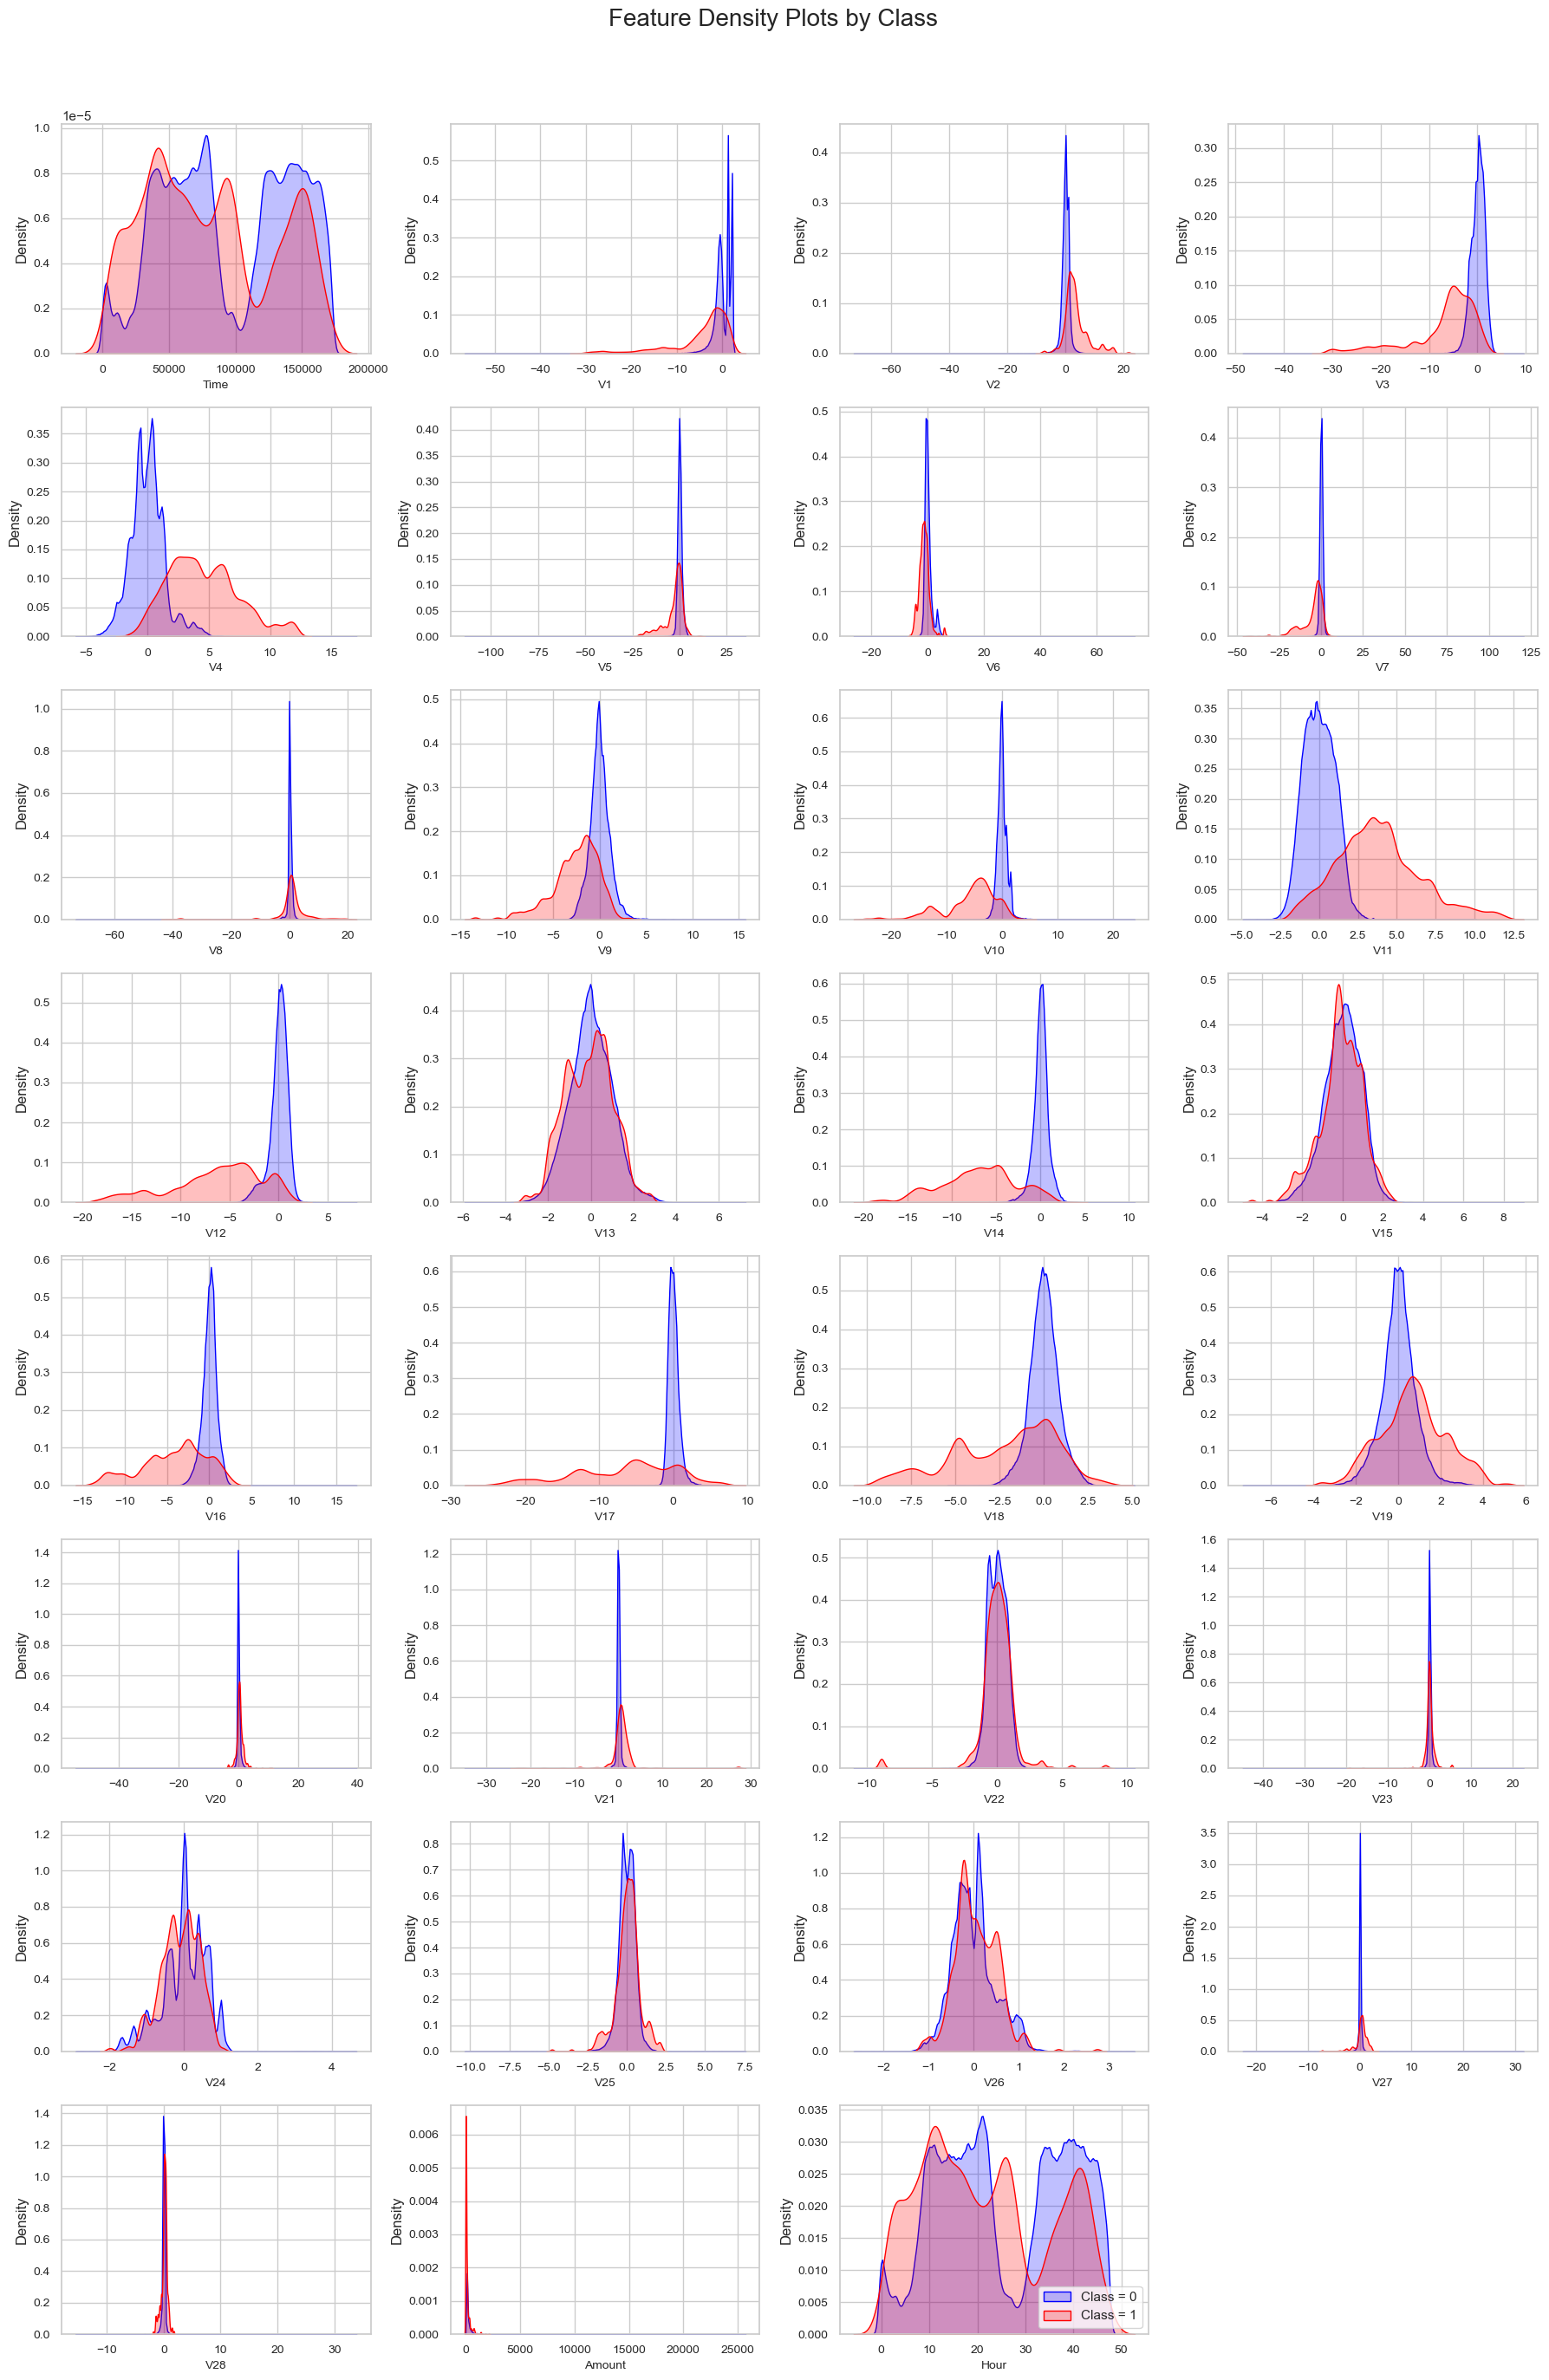

In [171]:

# Filter numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns.drop('Class')

# Split the data
t0 = df[df['Class'] == 0]
t1 = df[df['Class'] == 1]

# Plot setup
sns.set_style('whitegrid')
fig, axes = plt.subplots(8, 4, figsize=(18, 28))  # Adjust size based on features
fig.suptitle('Feature Density Plots by Class', fontsize=20)

# Loop through features and plot
for i, feature in enumerate(numeric_columns):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    sns.kdeplot(data=t0, x=feature, bw_adjust=0.5, label="Class = 0", ax=ax, fill=True, color="blue")
    sns.kdeplot(data=t1, x=feature, bw_adjust=0.5, label="Class = 1", ax=ax, fill=True, color="red")
    ax.set_xlabel(feature, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Hide unused subplots
for j in range(i + 1, 32):  # 8 rows * 4 columns = 32 plots
    row, col = divmod(j, 4)
    fig.delaxes(axes[row, col])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend()
plt.show()



For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

vii) Predictive models :- 

Predictive models are a type of statistical or machine learning models used to forecast future outcomes based on historical data. These models use patterns found in existing data to predict trends, behaviors, or values for new, unseen data. The process typically involves training a model using historical data, which includes input features (independent variables) and known outcomes (dependent variables). Once the model is trained, it can be used to make predictions or decisions without needing to be explicitly programmed for each possible scenario.

There are various types of predictive models, including linear regression, decision trees, random forests, support vector machines (SVMs), and neural networks, each suited to different types of data and prediction problems. Predictive models are widely used in applications such as forecasting sales, detecting fraud, predicting customer behavior, and more. 

Define predictors and target values¶
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.


In [225]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']


Split data in train, test and validation set
Let's define train, validation and test sets.

In [228]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [230]:
from sklearn.model_selection import train_test_split

# Define input features and target variable
X = df.drop('Class', axis=1)   # Features
y = df['Class']                # Target

# Split the data into training and testing sets (80% train, 10 % validation & 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (227845, 31)
Testing set shape: (56962, 31)


viii) Model Training & Evaluation  :-

Model Training is the process of teaching a machine learning model to recognize patterns in data by feeding it input features and corresponding labels. The model adjusts its internal parameters to minimize prediction errors through multiple iterations.

Model Evaluation is the process of assessing the model’s performance on unseen data to check how well it generalizes. It uses metrics like accuracy, precision, recall, and mean squared error to evaluate the model's effectiveness. This step helps identify issues like overfitting and ensures reliable predictions on new data.


CLASSIFICATION ALGORITHMS :- 

Classification algorithms are a type of supervised machine learning method used to predict categorical labels (classes) for given input data. The algorithm learns from labeled training data and assigns the correct class to new, unseen data.

Classification works by identifying patterns and relationships between input features and the output class label. The model creates decision boundaries based on these patterns to separate different classes.


        >>RANDOM FOREST CLASSIFIER :- 

        Random Forest Classifier is an ensemble learning method that builds multiple decision trees during training and merges their outputs (via majority voting) to improve accuracy and control overfitting. The key intuition is that combining the predictions of many diverse models reduces variance and improves generalization. Each tree in the forest is trained on a random subset of the data and features, which introduces diversity and makes the model robust against noise. It’s widely used for classification tasks due to its high accuracy, scalability, and ability to handle missing data and non-linear relationships.
       
        

Define model parameters
Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [191]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
NO_JOBS = -1               # Use all available CPU cores
RANDOM_STATE = 42          # Ensures reproducibility
RFC_METRIC = 'gini'        # or 'entropy'
NUM_ESTIMATORS = 100       # Number of trees in the forest

# Initialize the classifier
clf = RandomForestClassifier(
    n_jobs=NO_JOBS,
    random_state=RANDOM_STATE,
    criterion=RFC_METRIC,
    n_estimators=NUM_ESTIMATORS,
    verbose=0
)


Let's train the RandonForestClassifier using the train_df data and fit function.

In [197]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=-1, random_state=42)

Let's now predict the target values for the valid_df data, using predict function.

In [204]:
preds = clf.predict(valid_df[predictors])

Let's also visualize the features importance.

Features importance

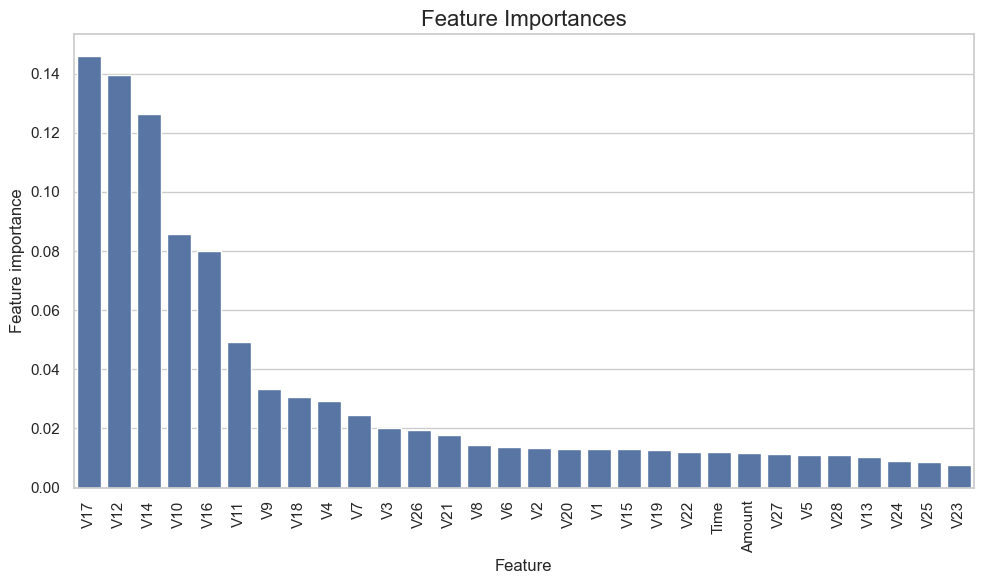

In [207]:
# Create DataFrame of feature importances
tmp = pd.DataFrame({
    'Feature': predictors,
    'Feature importance': clf.feature_importances_
})

# Sort features by importance
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Plotting without any warnings
plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)

# Remove palette to avoid warning
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)

# Rotate x-axis labels safely
plt.xticks(rotation=90)

# Adjust and show
plt.tight_layout()
plt.show()


The most important features are V17, V12, V14, V10, V11, V16.

Confusion matrix
Let's show a confusion matrix for the results we obtained.

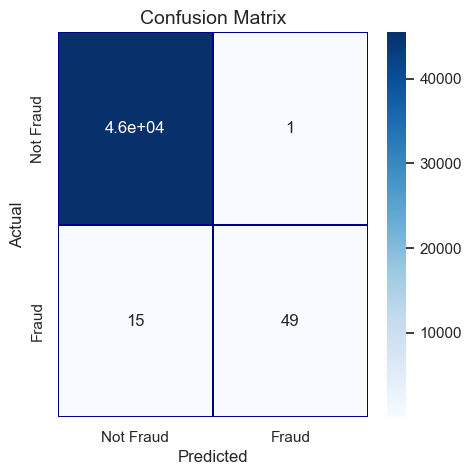

In [210]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Type I error and Type II error
We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

Example:-  Scenario: COVID-19 Test

Null Hypothesis (H₀): The person does not have COVID-19.

Alternative Hypothesis (H₁): The person has COVID-19.

❌ Type I Error (False Positive)
You reject H₀ when it's actually true.

Example: The test says the person has COVID-19, but they are actually healthy.
🧪 Healthy person wrongly diagnosed as positive.

❌ Type II Error (False Negative)
You fail to reject H₀ when it's actually false.

Example: The test says the person does NOT have COVID-19, but they are actually infected.
😷 Infected person wrongly told they're negative.



Error Type	              What Happens                      	     Real-World Impact
Type I	              False Alarm (False Positive)	            Unnecessary isolation, stress
Type II               Missed Detection (False Negative)	       Person spreads disease unknowingly


Let's calculate the ROC-AUC score 

Area under curve

In [214]:
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

The ROC-AUC score obtained with RandomForrestClassifier is 0.88

AdaBoostClassifier :-AdaBoostClassifier stands for Adaptive Boosting Classifier

AdaBoostClassifier (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners, typically decision stumps (shallow decision trees), to create a strong classifier. It works by iteratively training models, giving more weight to incorrectly classified instances in each round. The final prediction is made by aggregating the weighted predictions of all models. AdaBoost focuses on hard-to-classify examples, improving performance without overfitting, especially with simple base learners. A real-world application is email spam detection, where AdaBoost identifies patterns like "Buy now" in spam emails and iteratively refines its focus on misclassified emails. It is valuable in domains like fraud detection and disease diagnosis, as it enhances simple models and is robust to noisy data, reducing the risk of overfitting.


Prepare the model
Let's set the parameters for the model and initialize the model.

In [338]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with SAMME (stable for future versions)
clf = AdaBoostClassifier(
    random_state=42,
    algorithm='SAMME',        # Use SAMME instead of deprecated SAMME.R
    learning_rate=0.8,
    n_estimators=100
)


Now the model is ready to be trained with clf.fit()
Let's fit the model.

In [341]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=42)

Predict the target values
Let's now predict the target values for the valid_df data, using predict function.

In [347]:
preds = clf.predict(valid_df[predictors])

Features importance
Let's see also the features importance.

C:\Users\POOJA\AppData\Local\Temp\ipykernel_8492\3992975389.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



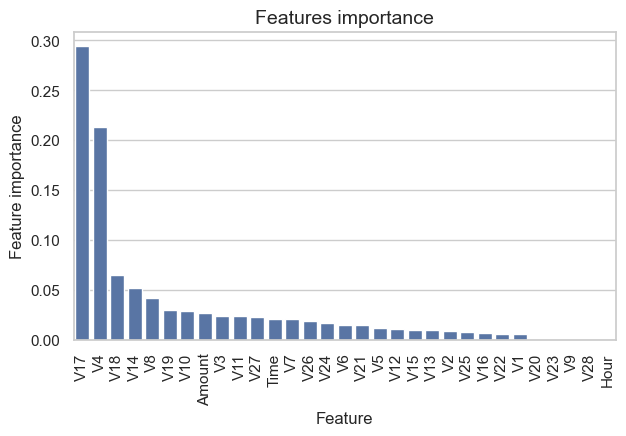

In [350]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Confusion matrix
Let's visualize the confusion matrix.

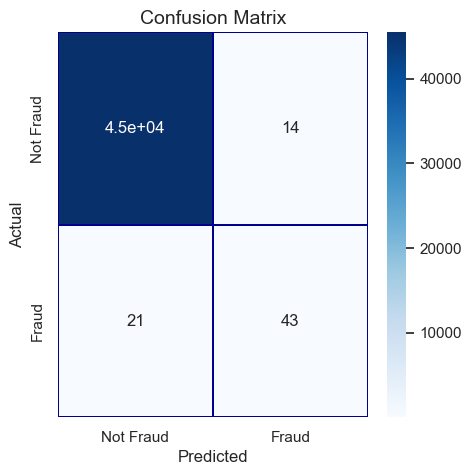

In [353]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.

Area under curve

In [356]:
roc_auc_score(valid_df[target].values, preds)

0.835783670750467

The ROC-AUC score obtained with AdaBoostClassifier is 0.83.

  >>CatBoostClassifier :-

CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data 

CatBoostClassifier is an advanced gradient boosting algorithm developed by Yandex, specifically designed to handle categorical features efficiently without the need for extensive preprocessing like one-hot encoding. Its name stands for "Categorical Boosting" and it is particularly useful when working with datasets that contain a mix of numerical and categorical variables. CatBoost automatically encodes categorical features using an innovative technique called ordered boosting, which reduces overfitting and improves model generalization. It also supports fast training, great out-of-the-box accuracy, and minimal tuning compared to other boosting algorithms like XGBoost or LightGBM. CatBoost is robust to missing values and handles imbalanced data well, making it highly suitable for real-world classification problems such as fraud detection, customer churn, or credit scoring. Its ease of use and high performance make it a go-to model when working with structured data and complex datasets involving categorical variables.

Prepare the model
Let's set the parameters for the model and initialize the model.

In [360]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier with custom parameters
clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.02,
    depth=12,
    eval_metric='AUC',
    random_seed=42,
    bagging_temperature=0.2,
    od_type='Iter',
    od_wait=100,
    verbose=100  # Show training output every 100 iterations
)



In [362]:
# Fit the model (verbose is handled inside the classifier, no need to pass in fit())
clf.fit(train_df[predictors], train_df[target])

0:	total: 694ms	remaining: 5m 46s
100:	total: 38.9s	remaining: 2m 33s
200:	total: 1m 15s	remaining: 1m 52s
300:	total: 1m 52s	remaining: 1m 14s
400:	total: 2m 28s	remaining: 36.6s
499:	total: 3m 8s	remaining: 0us


Predict the target values 
Let's now predict the target values for the val_df data, using predict function.

In [365]:
preds = clf.predict(valid_df[predictors])

Features importance Let's see also the features importance.

C:\Users\POOJA\AppData\Local\Temp\ipykernel_8492\1035525770.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



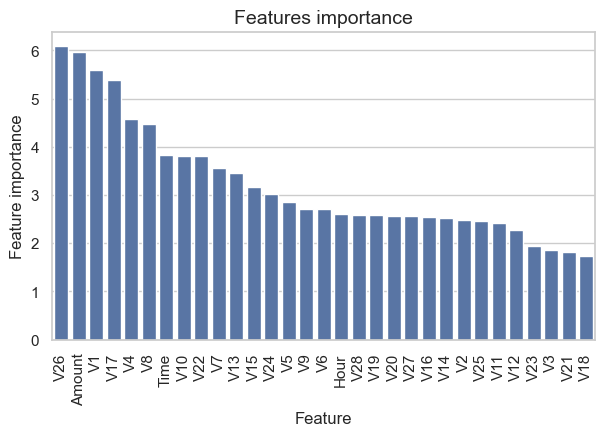

In [368]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Confusion matrix Let's visualize the confusion matrix.

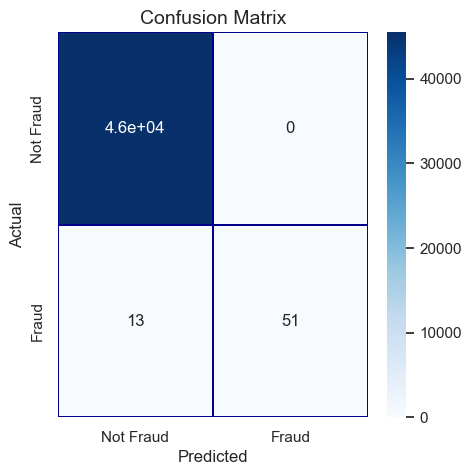

In [371]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC :- Area under curve

In [374]:
roc_auc_score(valid_df[target].values, preds)

0.8984375

The ROC-AUC score obtained with CatBoostClassifier is 0.89

XGBoost :- 

XGBoost (Extreme Gradient Boosting) is a highly efficient and scalable machine learning algorithm based on gradient boosting, widely used for structured data problems such as fraud detection, credit scoring, and recommendation systems. It builds decision trees sequentially, where each tree corrects the errors of the previous ones using both first- and second-order derivatives, which makes optimization more accurate. XGBoost stands out due to its speed, regularization (L1 and L2), built-in handling of missing values, support for parallel processing, and robustness against overfitting. These features make it a favorite in data science competitions like Kaggle, where high model performance is critical. Its ability to handle large datasets with minimal tuning while delivering state-of-the-art accuracy makes XGBoost an essential tool for practitioners seeking both power and efficiency in classification and regression tasks. Its smart use of computational resources and consistent results have made it a go-to solution in real-world machine learning pipelines.

Let's prepare the model.

Prepare the model
We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.



In [383]:
import xgboost as xgb
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, train and valid)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

Train the model Let's train the model.

In [386]:
import xgboost as xgb

# Define parameters clearly
params = {
    'objective': 'binary:logistic',  # or 'multi:softprob' for multi-class
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 6,
    'seed': 42,
    'verbosity': 1  # 0 = silent, 1 = warning, 2 = info, 3 = debug
}

# Convert to DMatrix format
dtrain = xgb.DMatrix(data=train_df[predictors], label=train_df[target])
dvalid = xgb.DMatrix(data=valid_df[predictors], label=valid_df[target])

# Watchlist for evaluation
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

# Train the model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=MAX_ROUNDS,
    evals=watchlist,
    early_stopping_rounds=EARLY_STOP,
    maximize=True,
    verbose_eval=VERBOSE_EVAL  # set to 100 or True for periodic logs
)


[0]	train-auc:0.97937	eval-auc:0.95958
[50]	train-auc:0.99993	eval-auc:0.98731
[100]	train-auc:1.00000	eval-auc:0.98811
[118]	train-auc:1.00000	eval-auc:0.98636


The best validation score (ROC-AUC) was 0.98636, for round 118

Plot variable importance

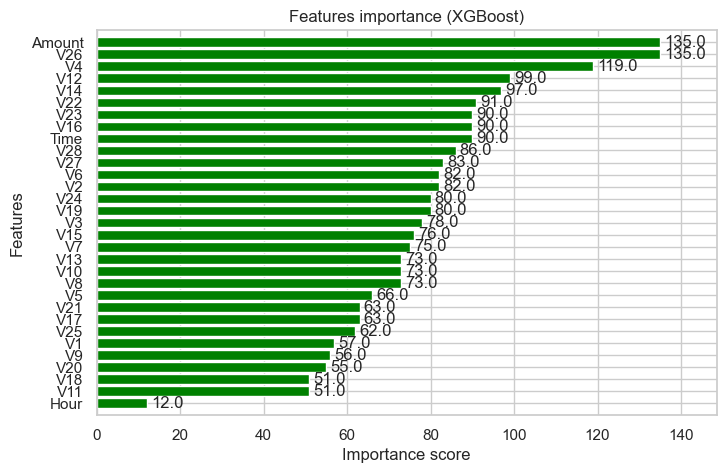

In [390]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

Predict test set We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [395]:
preds = model.predict(dtest)

Area under curve Let's calculate ROC-AUC.

In [398]:
roc_auc_score(test_df[target].values, preds)

0.9868843886738714

The AUC score for the prediction of fresh data (test set) is 0.986

>>LightGBM :-

LightGBM (Light Gradient Boosting Machine) is a powerful, fast, and efficient gradient boosting framework based on decision tree algorithms. It is designed to be highly performant with large datasets and supports both classification and regression tasks. The intuition behind LightGBM is to build trees leaf-wise rather than level-wise (like traditional boosting methods), which allows it to reduce loss more efficiently and handle complex patterns in data. It also uses histogram-based algorithms and gradient-based one-side sampling (GOSS) to improve speed and accuracy. LightGBM is important for model evaluation because it can quickly train accurate models and provides built-in metrics like AUC, log loss, and accuracy, making it easier to monitor performance. Its ability to handle categorical features directly, along with automatic feature importance scoring, helps data scientists make informed decisions about model performance, overfitting, and feature selection during the evaluation phase.

Define model parameters
Let's set the parameters for the model. We will use these parameters only for the first lgb model.

In [405]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

Prepare the model
Let's prepare the model, creating the Datasets data structures from the train and validation sets.

In [408]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

Run the model
Let's run the model, using the train function.

In [419]:
pip install --upgrade lightgbm

Note: you may need to restart the kernel to use updated packages.


In [438]:
params = {
    'learning_rate': 0.039,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'random_state': 42,
    'n_estimators': MAX_ROUNDS
}


In [442]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# Define the model
model = LGBMClassifier(
    n_estimators=MAX_ROUNDS,
    learning_rate=0.039,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

# Train the model with callbacks for early stopping and logging
model.fit(
    train_df[predictors], train_df[target],
    eval_set=[(valid_df[predictors], valid_df[target])],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=2 * EARLY_STOP),
        log_evaluation(period=VERBOSE_EVAL)
    ]
)


[LightGBM] [Info] Number of positive: 330, number of negative: 181946
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7698
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001810 -> initscore=-6.312373
[LightGBM] [Info] Start training from score -6.312373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.039, max_depth=2,
               n_estimators=1000, random_state=42, subsample=0.8)

In [446]:
from sklearn.metrics import roc_auc_score

# Calculate and print the Validation AUC
valid_preds_proba = model.predict_proba(valid_df[predictors])[:, 1]  # Get probabilities for the positive class
valid_auc = roc_auc_score(valid_df[target], valid_preds_proba)  # Compute AUC score
print("✅ Validation AUC:", valid_auc)


✅ Validation AUC: 0.9290481471816284


In [ ]:
#We prepare the test prediction, from the averaged predictions for test over the 5 folds.
pred = test_preds

iX)MODEL COMPARISON


C:\Users\POOJA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\POOJA\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\POOJA\AppData\Local\Temp\ipykernel_8492\1862810107.py:64: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

C:\Users\POOJA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.



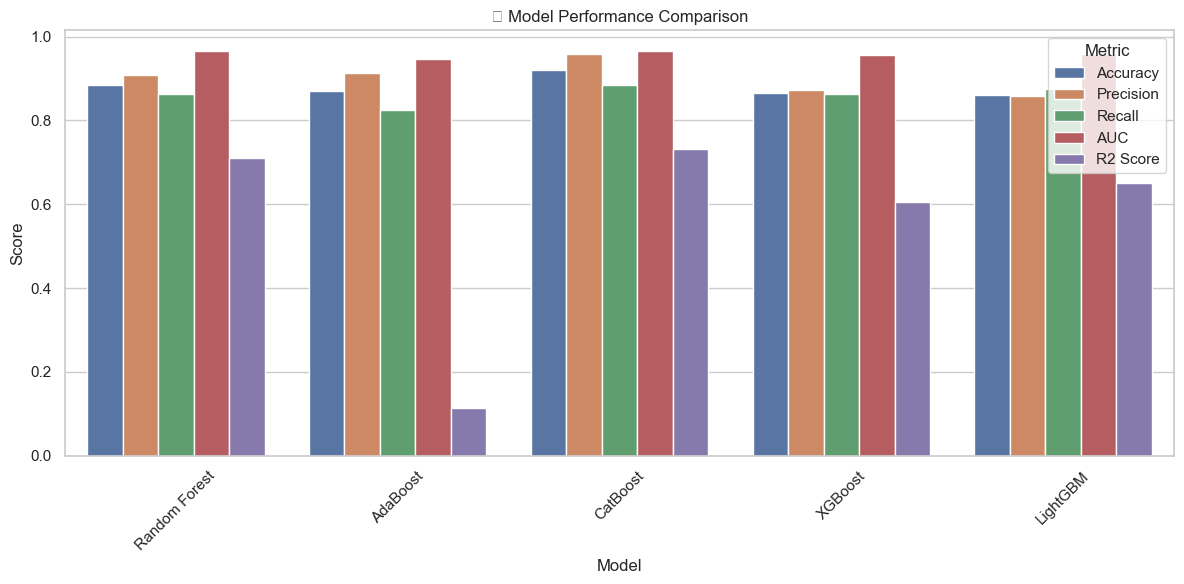

In [491]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, r2_score
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# 2. Create dummy dataset (if you don’t already have one)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f'feature{i}' for i in range(1, 6)])
df['target_column'] = y

# 3. Define predictors and target
predictors = [col for col in df.columns if col != 'target_column']
target = 'target_column'

# 4. Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# 5. Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# 6. Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_proba = model.predict_proba(X_valid)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_valid, y_pred),
        'Precision': precision_score(y_valid, y_pred),
        'Recall': recall_score(y_valid, y_pred),
        'AUC': roc_auc_score(y_valid, y_proba),
        'R2 Score': r2_score(y_valid, y_proba)
    })

# 7. Create results DataFrame
results_df = pd.DataFrame(results)
print("✅ Model comparison results:\n")
print(results_df)

# 8. Plot performance graph
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric')
plt.title("📊 Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Xi) Conclusions :- 

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.88 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.83) for prediction of the test set target values.

We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.89.

We then experimented with a XGBoost model. In this case, se used the validation set for validation of the training model. The best validation score obtained was 0.984. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was 0.92.

We then presented the data to a LightGBM model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict 'Class' value, i.e. detecting if a transaction was fraudulent. With the first method we obtained values of AUC for the validation set around 0.974. For the test set, the score obtained was 0.946.
With the cross-validation, we obtained an AUC score for the test prediction of 0.93.

Xii)References


[1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud

[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis

[3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

[5] AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

[6] CatBoostClassifier, https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/

[7] XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html

[8] LightGBM Python implementation, https://github.com/Microsoft/LightGBM/tree/master/python-package

[9] LightGBM algorithm, https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf
